In [26]:
import os
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd

In [2]:
out_path = Path(os.getenv("DATA_PATH")) / "generated"

In [11]:
zone = "31.1.01"
df = pd.read_csv(out_path / "pop_exposed" / f"{zone}.csv")

In [44]:
total_pop = df["cdf_abs"].iloc[-1]

def abs_to_frac(x: float) -> float:
    return x / total_pop

def frac_to_abs(x: float) -> float:
    return x * total_pop

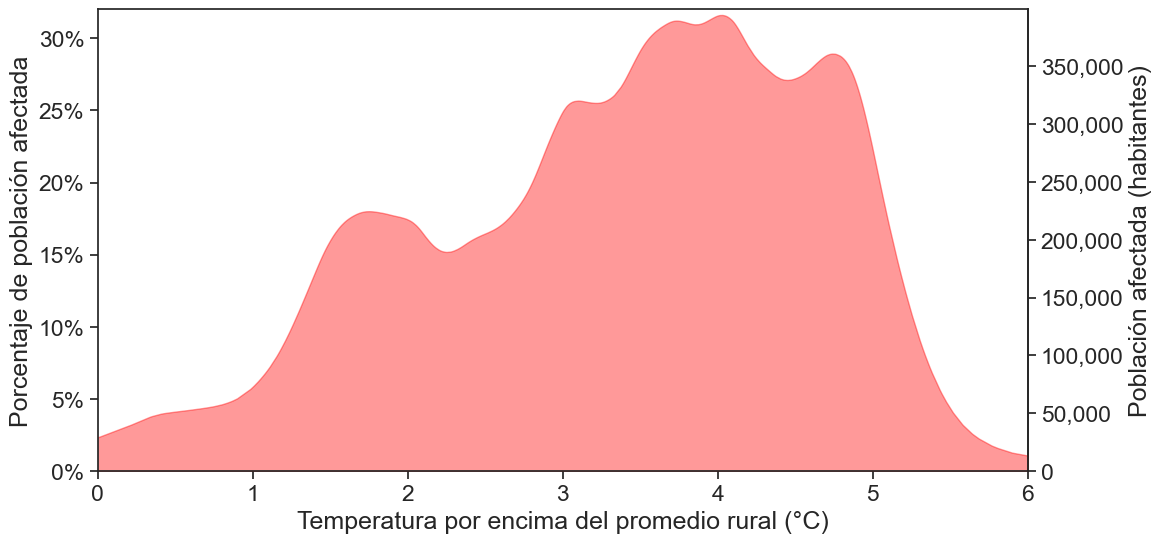

In [53]:
x = df["temp"].values
y = df["pdf"].values
y2 = df["pdf_abs"].values

sns.set_theme(font_scale=1.5, style="ticks")
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(x, 0, y, alpha=0.4, color="red")

ax.set_xlim(0, 6)
ax.set_ylim(0, 0.32)

ax.set_xlabel("Temperatura por encima del promedio rural (°C)")
ax.set_ylabel("Porcentaje de población afectada")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

secax = ax.secondary_yaxis("right", functions=(frac_to_abs, abs_to_frac))
secax.set_ylabel("Población afectada (habitantes)")
secax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

fig.savefig("./temp.jpg", bbox_inches="tight", dpi=200)